In [104]:
import reXplan as rx
import numpy as np
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *

from pandapower.plotting.plotly import pf_res_plotly
warnings.simplefilter("ignore") # warning are ignored for now

simulationName = 'basic_example_tim';
network = rx.network.Network(simulationName);
simulation = rx.simulation.Sim(simulationName);

Duration of simulation is 40 timesteps.
Start of hazard at timestep 12, end at timestep 17 (duration: 5 timesteps)


In [ ]:
# POWER GRID
pf_res_plotly(network.pp_network);

In [ ]:
# FRAGILITY CURVE
sns.set(rc={'figure.figsize':(8,4)})
xnew = np.linspace(0, 92, num=100, endpoint=True)
fig, ax = rx.fragilitycurve.plotFragilityCurves(network.fragilityCurves, xnew)

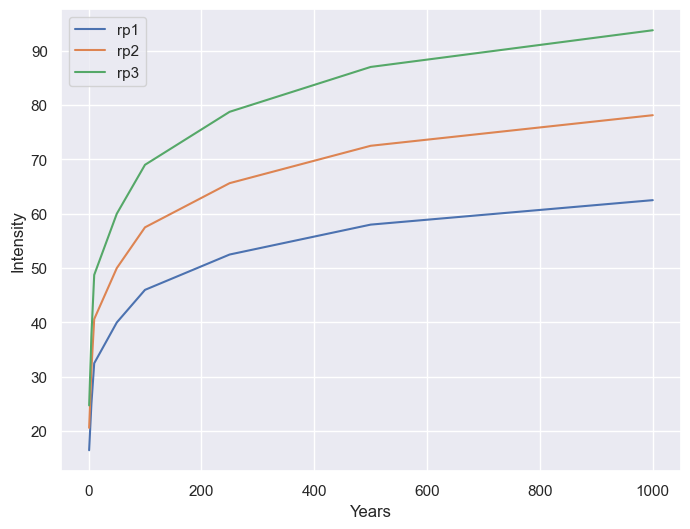

In [106]:
# RETURN PERIODS
sns.set(rc={'figure.figsize':(8,6)})
for rp in network.returnPeriods.keys():
    sns.lineplot(x=network.returnPeriods[rp].x_data, y=network.returnPeriods[rp].y_data, label=rp)
plt.xlabel('Years')
plt.ylabel('Intensity')
plt.show()

# INITIALIZE ----------

In [ ]:
simulation.initialize_model_rp(network=network, ref_return_period="rp3", mc_iteration_factor=10, nStrataSamples=1000, maxStrata=3)

## ASSET BASED RESULTS

TypeError: object of type 'NoneType' has no len()

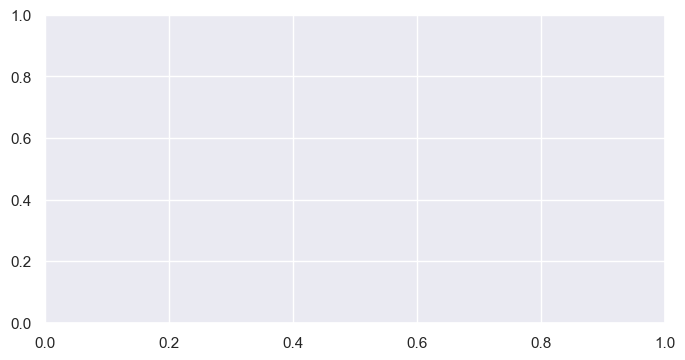

In [105]:
# HISTOGRAM
sns.set(rc={'figure.figsize':(8,4)})
plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

In [21]:
df = pd.read_csv(rx.config.path.montecarloDatabaseFile(simulationName), index_col = [0, 1, 2, 3, 4])
# index_col -> says which columns are indexes

# df = filter_non_converged_iterations(df)
# filters non-converged iterations

df_line = group_by(df, 'sum', 'iteration', 'field', 'type').loc[:,:,'Line']

df_line_quantiles = invert(get_quantiles_on_iterations(df_line, [0.05, 0.25, 0.5, 0.75,  0.95]))
df_line = invert(df_line)


In [25]:
px.line(df_line, x=df_line.index, y = 'in_service', color = 'iteration').update_layout(xaxis_title="Timesteps", yaxis_title="Number of lines in-service")

In [31]:
df_line = group_by(filter(df, type = 'Line'), 'sum', 'iteration', 'field', 'type').loc[:,:,'Line']
df_line_quantiles = invert(get_quantiles_on_iterations(df_line, [0.05, 0.25, 0.5, 0.75, 0.95]))
df_line = invert(df_line)

In [32]:
px.line(df_line_quantiles, x=df_line_quantiles.index, y = 'in_service', color = 'quantile').update_layout(xaxis_title="Timesteps", yaxis_title="Number of lines in-service")

# RUN ----------

In [2]:
# Run Monte Carlo Simulations: Creating OPF based KPIs
time = rx.simulation.Time(start = 10, duration = 20)
mc_range = list(range(268,295))
simulation.run(network, iterationSet = mc_range, time = time, run_type = 'pm_ac_opf', delta = 1e-16, saveOutput = True)

Strata = 1; Iteration = 268


 25%|██▌       | 5/20 [00:29<00:53,  3.58s/it]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 35%|███▌      | 7/20 [00:29<00:23,  1.84s/it]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 45%|████▌     | 9/20 [00:29<00:12,  1.12s/it]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 55%|█████▌    | 11/20 [00:30<00:06,  1.37it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 65%|██████▌   | 13/20 [00:30<00:03,  1.98it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 75%|███████▌  | 15/20 [00:30<00:01,  

Strata = 1; Iteration = 269


 10%|█         | 2/20 [00:00<00:01, 17.52it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 11.87it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 10.15it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 40%|████      | 8/20 [00:00<00:01, 10.47it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 50%|█████     | 10/20 [00:00<00:00, 10.40it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 60%|██████    | 12/20 [00:01<00:00, 10

Strata = 2; Iteration = 270


 10%|█         | 2/20 [00:00<00:01, 14.30it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 25%|██▌       | 5/20 [00:00<00:01, 11.60it/s]


Iteration 270 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 271


 15%|█▌        | 3/20 [00:00<00:01, 13.03it/s]


Iteration 271 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 272


 10%|█         | 2/20 [00:00<00:01, 17.92it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 12.31it/s]


Iteration 272 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 273


 10%|█         | 2/20 [00:00<00:01, 17.10it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 12.33it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 11.73it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 40%|████      | 8/20 [00:00<00:01, 11.64it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 50%|█████     | 10/20 [00:00<00:00, 11.75it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 60%|██████    | 12/20 [00:01<00:00, 10

Strata = 2; Iteration = 274


 20%|██        | 4/20 [00:00<00:01,  8.89it/s]


Iteration 274 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 275


 15%|█▌        | 3/20 [00:00<00:01, 13.67it/s]


Iteration 275 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 276


 10%|█         | 2/20 [00:00<00:00, 18.12it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 25%|██▌       | 5/20 [00:00<00:01, 12.93it/s]


Iteration 276 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 277


 10%|█         | 2/20 [00:00<00:01, 17.03it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 25%|██▌       | 5/20 [00:00<00:01, 12.29it/s]


Iteration 277 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 278


 15%|█▌        | 3/20 [00:00<00:01, 14.16it/s]


Iteration 278 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 279


 15%|█▌        | 3/20 [00:00<00:01, 13.15it/s]


Iteration 279 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 280


 15%|█▌        | 3/20 [00:00<00:01, 14.36it/s]


Iteration 280 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 281


  0%|          | 0/20 [00:00<?, ?it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 15%|█▌        | 3/20 [00:00<00:01, 15.98it/s]


Iteration 281 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 282


 10%|█         | 2/20 [00:00<00:01, 17.43it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 13.10it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 13.16it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 40%|████      | 8/20 [00:00<00:00, 13.85it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 50%|█████     | 10/20 [00:00<00:00, 13.63it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 60%|██████    | 12/20 [00:00<00:00, 13

Strata = 2; Iteration = 283


  0%|          | 0/20 [00:00<?, ?it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 15%|█▌        | 3/20 [00:00<00:01, 15.65it/s]


Iteration 283 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 284


 15%|█▌        | 3/20 [00:00<00:01, 13.11it/s]


Iteration 284 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 285


 10%|█         | 2/20 [00:00<00:01, 17.99it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 25%|██▌       | 5/20 [00:00<00:01, 13.51it/s]


Iteration 285 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 286


 10%|█         | 2/20 [00:00<00:00, 18.52it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 13.02it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 13.32it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 40%|████      | 8/20 [00:00<00:00, 13.27it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 50%|█████     | 10/20 [00:00<00:00, 13.63it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 60%|██████    | 12/20 [00:00<00:00, 13

Strata = 2; Iteration = 287


  0%|          | 0/20 [00:00<?, ?it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 15%|█▌        | 3/20 [00:00<00:01, 14.56it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 25%|██▌       | 5/20 [00:00<00:01, 13.42it/s]


Iteration 287 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 288


 10%|█         | 2/20 [00:00<00:01, 17.75it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 14.36it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 13.03it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 40%|████      | 8/20 [00:00<00:00, 13.45it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 50%|█████     | 10/20 [00:00<00:00, 12.85it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 60%|██████    | 12/20 [00:00<00:00, 13

Strata = 2; Iteration = 289


 15%|█▌        | 3/20 [00:00<00:01, 14.55it/s]


Iteration 289 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 290


 10%|█         | 2/20 [00:00<00:01, 16.81it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 13.57it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 12.78it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 40%|████      | 8/20 [00:00<00:00, 13.00it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 50%|█████     | 10/20 [00:00<00:00, 12.64it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 60%|██████    | 12/20 [00:00<00:00, 12

Strata = 2; Iteration = 291


 15%|█▌        | 3/20 [00:00<00:01, 14.49it/s]


Iteration 291 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 292


 10%|█         | 2/20 [00:00<00:01, 13.69it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 11.84it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 30%|███       | 6/20 [00:00<00:01, 12.05it/s]


Iteration 292 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 293


 10%|█         | 2/20 [00:00<00:01, 17.89it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 13.86it/s]


Iteration 293 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Strata = 2; Iteration = 294


 10%|█         | 2/20 [00:00<00:00, 19.50it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 20%|██        | 4/20 [00:00<00:01, 13.16it/s]PowerModels.jl does not consider reactive power cost - costs are ignored
PowerModels.jl does not consider reactive power cost - costs are ignored
 35%|███▌      | 7/20 [00:00<00:01, 12.92it/s]


Iteration 294 did not execute successfully. index 4 is out of bounds for axis 0 with size 4
Saving output database...
done!


# OPF based KPIs

In [34]:
df = pd.read_csv(rx.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3, 4]) # read database with results
df = filter_non_converged_iterations(df) # filterining non-converged iterations

Dropped iterations: []


In [ ]:
df

In [96]:
df_network_condensed = filter(df, type = 'network').sum(axis = 1) # sum over timesteps

df_network_condensed.head()

strata  iteration  field                      type     id 
0       0          energy_not_served_mwh      network  NaN    111.598139
                   loss_of_load_p_duration_h  network  NaN      5.000000
                   loss_of_load_p_mw          network  NaN    111.598058
                   loss_of_load_p_percentage  network  NaN     25.501032
        1          energy_not_served_mwh      network  NaN    248.106464
dtype: float64

In [18]:
df_network_condensed_ = invert(df_network_condensed)
px.histogram(df_network_condensed_, x='energy_not_served_mwh', histnorm='probability').update_layout(xaxis_title="Energy not served [MWh]", yaxis_title="Probability")

In [ ]:
statistics = df_network_condensed.groupby(['strata','field']).mean() # average over iterations
#EEENS = statistics['energy_not_served_mwh']
#LOLE = statistics['loss_of_load_p_duration_h']
#print(f'Expected EENS: {EEENS.round(2)} MWh, Expected LOL: {LOLE.round(2)} h')
statistics

In [102]:
statistics = df_network_condensed.groupby('field').mean() # average over iterations
ENSE = statistics['energy_not_served_mwh']
LOLE = statistics['loss_of_load_p_duration_h']
print(f'ENS expected: {ENSE.round(2)} MWh, LOL expected: {LOLE.round(2)} h')

strata  field                    
0       energy_not_served_mwh         209.979794
        loss_of_load_p_duration_h       7.020000
        loss_of_load_p_mw             209.979713
        loss_of_load_p_percentage      52.073968
1       energy_not_served_mwh         669.278015
        loss_of_load_p_duration_h      10.609137
        loss_of_load_p_mw             669.277941
        loss_of_load_p_percentage     168.041677
2       energy_not_served_mwh        1782.803275
        loss_of_load_p_duration_h      16.000000
        loss_of_load_p_mw            1782.803212
        loss_of_load_p_percentage     448.258432
dtype: float64

In [85]:
df_load = group_by(filter(df, type = 'load'), 'sum', 'iteration', 'field', 'type')
df_load_quantiles = invert(get_quantiles_on_iterations(df_load, [0.05, 0.25, 0.5, 0.75, 0.95]))
df_load_quantiles['loss_of_load_p_percentage'] = (df_load_quantiles['loss_of_load_p_mw'])/df_load_quantiles['max_p_mw'] *100

In [82]:
px.line(df_load_quantiles, x=df_load_quantiles.index, y = 'loss_of_load_p_percentage', color = 'quantile').update_layout(xaxis_title="Timesteps", yaxis_title="Loss of load [%]")

In [17]:
df_network = invert(filter(df, type = 'network')) # filter network fields and invert for plotting
px.scatter(df_network, x=df_network.index, y= 'energy_not_served_mwh' ).update_layout(xaxis_title="Timesteps", yaxis_title="Energy not served [MWh]")

In [45]:
crt_loss_of_load = 70 # Defined as %
df_loss_of_load = df.loc[:,:,"loss_of_load_p_percentage","network"]
Survivability = pd.DataFrame(1 - (df_loss_of_load > crt_loss_of_load).sum() / df_loss_of_load.index.levels[0].size, columns = ['base case'])

<AxesSubplot: >

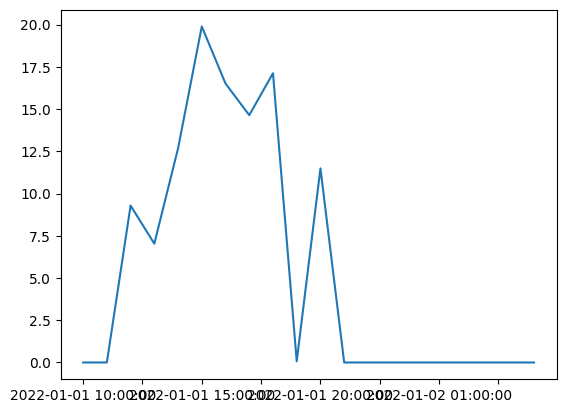

In [72]:
df_loss_of_load.iloc[5].plot()  # Measurement? MW?

In [80]:
Survivability

base case
2022-01-01 10:00:00   1.000000
2022-01-01 11:00:00   1.000000
2022-01-01 12:00:00   1.000000
2022-01-01 13:00:00   1.000000
2022-01-01 14:00:00   1.000000
2022-01-01 15:00:00  -1.666667
2022-01-01 16:00:00  -5.333333
2022-01-01 17:00:00  -3.666667
2022-01-01 18:00:00   1.000000
2022-01-01 19:00:00   1.000000
2022-01-01 20:00:00   1.000000
2022-01-01 21:00:00   1.000000
2022-01-01 22:00:00   1.000000
2022-01-01 23:00:00   1.000000
2022-01-02 00:00:00   1.000000
2022-01-02 01:00:00   1.000000
2022-01-02 02:00:00   1.000000
2022-01-02 03:00:00   1.000000
2022-01-02 04:00:00   1.000000
2022-01-02 05:00:00   1.000000

In [79]:
px.line(Survivability).update_layout(xaxis_title="time", yaxis_title="Survivability")

In [15]:
import plotly.graph_objects as go
df_bus =invert(filter(df, type = 'bus'))
fig = go.Figure()

ids = df_bus['id'].drop_duplicates().to_list()

for id in ids:
    fig.add_trace(go.Violin(x=df_bus['id'][df_bus['id'] == id],
                            y=df_bus['vm_pu'][df_bus['id'] == id],
                            name=id,
                            #box_visible=True,
                            meanline_visible=True,
                            side='positive',
                            orientation = 'v'
                           )     
                 )
fig.update_layout(width=1000, height = 500)
fig.show()